In [51]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df1 = df.copy()

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

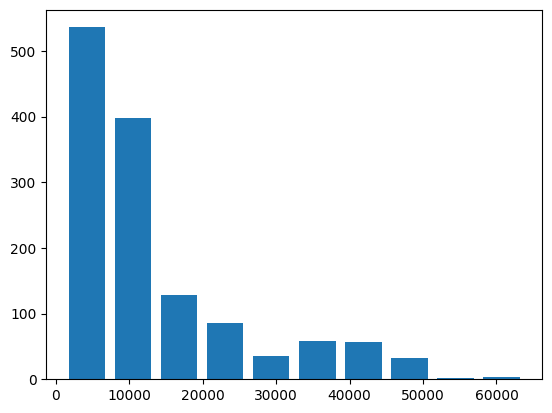

In [49]:
charges = df1['charges']
plt.hist(charges, bins = 10, rwidth=0.8)

(array([2519., 1677.,  441.,  173.,  122.,  108.,  168.,  201.,  263.,
         593.]),
 array([2.65429544e-07, 5.71214291e-06, 1.11588563e-05, 1.66055697e-05,
        2.20522830e-05, 2.74989964e-05, 3.29457098e-05, 3.83924231e-05,
        4.38391365e-05, 4.92858499e-05, 5.47325633e-05]),
 <BarContainer object of 10 artists>)

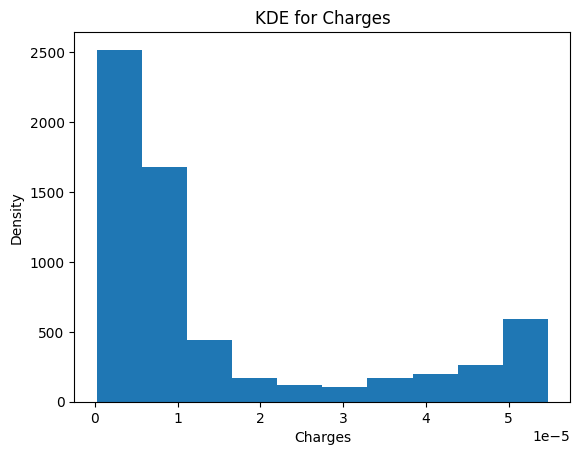

In [65]:
kernel = stats.gaussian_kde(charges)
x = [i for i in range(int(charges.min()), int(charges.max()), 10)]

density = kernel(x)
fig, ax  = plt.subplots()
plt.title('KDE for Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

plt.hist(density)

In [23]:
df1['smoker'] = df1['smoker'].replace({'yes': 1, 'no': 0}).astype(int)


In [24]:
df1.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


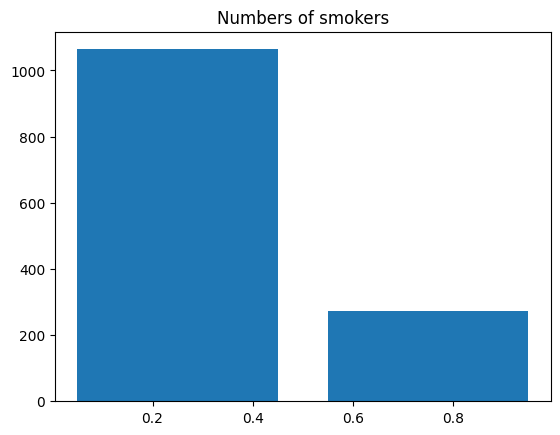

In [ ]:
#Right = non smoker, left = smoker
smokers = df1['smoker']
plt.title('Numbers of smokers')
plt.hist(smokers, bins = 2, rwidth=0.8)
plt.show()

In [40]:
df1[['smoker', 'charges']].corr()


,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


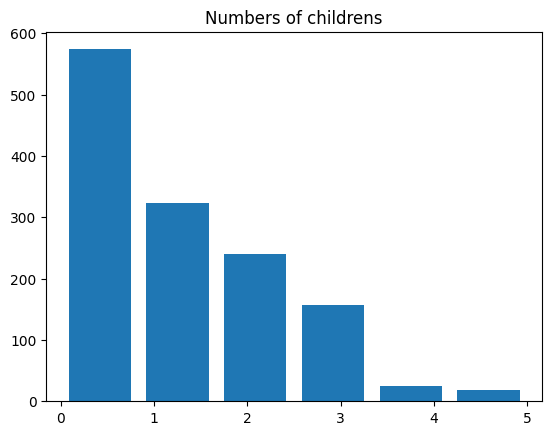

In [43]:
children = df1['children']
plt.title('Numbers of childrens')
plt.hist(children, bins = 6, rwidth=0.8)
plt.show()

In [44]:
df1[['children', 'charges']].corr()


,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [45]:
df1[['bmi', 'charges']].corr()


,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


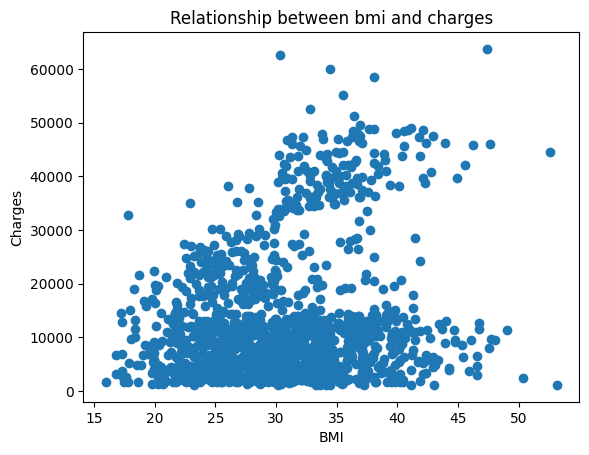

In [47]:
plt.title('Relationship between bmi and charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.scatter(df1['bmi'], df1['charges'])